In [96]:
# import libraries
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
import matplotlib.patches as patches
from fractions import Fraction

def plot_matrix(matrix, ax, title):

    min_val, max_val = 0, matrix.shape[1]

    for i in range(max_val):
        for j in range(max_val):
            c = matrix[j][i]
            ax.text(i+0.5, j+0.5, str(Fraction(c).limit_denominator()), va='center', ha='center')
    
    
    
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    
    ax.set_title(title)
    ax.grid()
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    
def convolution(img, pad_mode,kernel_name,progress=0, show_details=False):
    kernel = kernels[kernel_name]
    kernel_size = kernel.shape[0]
    pad = int((kernel_size-1) / 2)
    # apply the convolution
    img_transformed = img.copy()
    n_dims = img.shape[-1]
    img_pad = np.zeros_like(img, shape=(img.shape[0]+(pad*2), img.shape[1]+(pad*2),n_dims))
    for i in range(n_dims):
        img_pad[:,:,i] = np.pad(img[:,:,i], pad, mode=pad_mode)
    
    i=0
    j=0
    last_i = 0
    last_j = 0
    breaked = False
    last_square = np.zeros_like(img_pad, shape=(kernel_size,kernel_size,n_dims))
    last_square_res = np.zeros_like(img_pad, shape=(kernel_size,kernel_size,n_dims))
    if progress > 0:
        for i in range(img.shape[0]):
            if breaked:
                break
            j=0
            for j in range(img.shape[1]):
                last_square = img_pad[i:i+kernel_size, j:j+kernel_size]
                last_i = i
                last_j = j
                for s in range(n_dims):
                    img_transformed[i,j, s] = abs((img_pad[i:i+kernel_size, j:j+kernel_size, s] * kernel).sum())
                    last_square_res[:,:,s] = img_transformed[i,j,s]
                if i*img.shape[1] + j >= progress-1:
                    breaked = True
                    break
    if show_details:
        for dim in range(n_dims+1):
            if dim == 0:
                img_plot = img.copy()
                img_pad_plot = img_pad.copy()
                img_transformed_plot = img_transformed.copy()
                last_square_plot = last_square.copy() 
                last_square_res_plot = last_square_res.copy()
            else:
                img_plot = img.copy()[:,:,dim-1]
                img_pad_plot = img_pad.copy()[:,:,dim-1]
                img_transformed_plot = img_transformed.copy()[:,:,dim-1]
                last_square_plot = last_square.copy()[:,:,dim-1]
                last_square_res_plot = last_square_res.copy()[:,:,dim-1]

            name = names[dim]
            fig, (ax1,ax2,ax3, ax4, ax5) = plt.subplots(1,5, figsize=(20,15))
            ax1.imshow(img_plot, cmap='gray',vmin=0, vmax=255)
            ax1.set_axis_off()
            ax1.set_title(name)
            ax2.imshow(img_pad_plot, cmap='gray',vmin=0, vmax=255)
            ax2.set_axis_off()
            ax2.set_title('Padded')
            ax3.imshow(img_transformed_plot, cmap='gray',vmin=0, vmax=255)
            ax3.set_axis_off()
            ax3.set_title('Transformed')
            ax4.imshow(last_square_plot, cmap='gray',vmin=0, vmax=255)
            ax4.set_axis_off()
            ax4.set_title('Last Square')
            ax5.imshow(last_square_res_plot, cmap='gray',vmin=0, vmax=255)
            ax5.set_axis_off()
            ax5.set_title('Last Square Result')

            # Create a Rectangle patch
            rect1 = patches.Rectangle((last_j-0.55, last_i-0.55), 3, 3, linewidth=1, edgecolor='r', facecolor='none')
            rect2 = patches.Rectangle((last_j-0.55+1, last_i-0.55+1), 1, 1, linewidth=1, edgecolor='r', facecolor='none')


            # Add the patch to the Axes
            if progress > 0:
                ax2.add_patch(rect1)
                ax2.add_patch(rect2)

    else: 
        fig, (ax1,ax2,ax3, ax4, ax5) = plt.subplots(1,5, figsize=(20,15))
        ax1.imshow(img, cmap='gray',vmin=0, vmax=255)
        ax1.set_axis_off()
        ax1.set_title('Original')
        ax2.imshow(img_pad, cmap='gray',vmin=0, vmax=255)
        ax2.set_axis_off()
        ax2.set_title('Padded')
        ax3.imshow(img_transformed, cmap='gray',vmin=0, vmax=255)
        ax3.set_axis_off()
        ax3.set_title('Transformed')
        ax4.imshow(last_square, cmap='gray',vmin=0, vmax=255)
        ax4.set_axis_off()
        ax4.set_title('Last Square')
        ax5.imshow(last_square_res, cmap='gray',vmin=0, vmax=255)
        ax5.set_axis_off()
        ax5.set_title('Last Square Result')

        # Create a Rectangle patch
        rect1 = patches.Rectangle((last_j-0.55, last_i-0.55), 3, 3, linewidth=1, edgecolor='r', facecolor='none')
        rect2 = patches.Rectangle((last_j-0.55+1, last_i-0.55+1), 1, 1, linewidth=1, edgecolor='r', facecolor='none')


        # Add the patch to the Axes
        if progress > 0:
            ax2.add_patch(rect1)
            ax2.add_patch(rect2)
    


In [2]:
# read image
img_bgr = cv.imread('imgs/tree.png')
# img_bgr = cv.imread('imgs/puppy.jpeg')
img = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

img_dog = cv.imread('imgs/puppy.jpeg')
img_dog_gray = cv.cvtColor(img_dog, cv.COLOR_BGR2GRAY)
img_dog_gray = cv.resize(img_dog_gray, (300,300))[...,None]
img_tree = img.copy()

## Convolutions

<img src="imgs_markdown/convolution.png" width=600 height=400/>

### Kernels we will be using

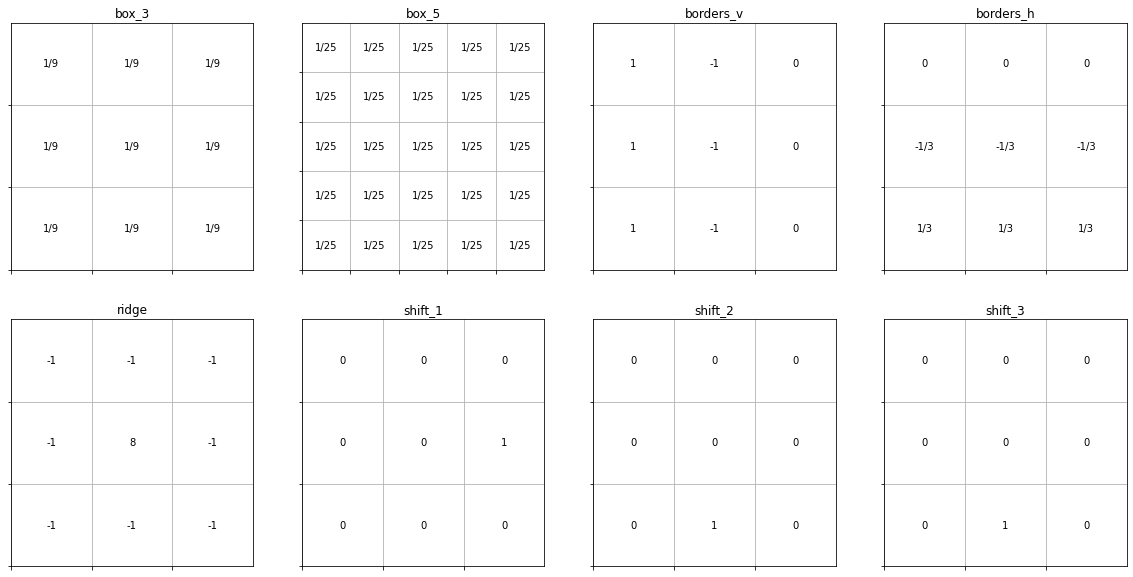

In [81]:
images = {
    "tree": img_tree,
    "tree_gray": cv.cvtColor(img_tree, cv.COLOR_RGB2GRAY)[...,None],
    "dog_gray": img_dog_gray
}

kernels = {
    "box_3": np.array([
        [1/9, 1/9, 1/9], 
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9]
    ]),
    "box_5": np.array([
        [1/25, 1/25, 1/25, 1/25, 1/25], 
        [1/25, 1/25, 1/25, 1/25, 1/25],
        [1/25, 1/25, 1/25, 1/25, 1/25],
        [1/25, 1/25, 1/25, 1/25, 1/25],
        [1/25, 1/25, 1/25, 1/25, 1/25]
    ]),
    "borders_v": np.array([
        [1, -1, 0], 
        [1, -1, 0],
        [1, -1, 0]
    ]),
    "borders_h": np.array([
        [1/3, 1/3, 1/3], 
        [-1/3, -1/3, -1/3],
        [0, 0, 0]
    ]),
    "ridge": np.array([
        [-1, -1, -1], 
        [-1, 8, -1],
        [-1, -1, -1]
    ]),
    "shift_1": np.array([
        [0, 0, 0], 
        [0, 0, 1],
        [0, 0, 0]
    ]),
    "shift_2": np.array([
        [0, 1, 0], 
        [0, 0, 0],
        [0, 0, 0]
    ]),
    "shift_3": np.array([
        [0, 1, 0], 
        [0, 0, 0],
        [0, 0, 0]
    ])
}



fig, axs = plt.subplots(2,4, figsize=(20,10))
axs = axs.flatten()

for i, (name, kernel) in enumerate(kernels.items()):
    ax = axs[i]
    plot_matrix(kernel, ax, name)

### Convolutions on RGB

In [94]:
image_name_1 = "tree"
img_1 = images[image_name_1].copy()
n_pixels_1 = len(img_1[:,:,0].ravel())
names = ["Original", "Red", "Green", "Blue"]

@interact(progress=(0,n_pixels_1), pad_mode = ['constant', 'edge', 'reflect'], kernel_name=list(kernels.keys()), show_details=[True,False])
def conv_interact(pad_mode,kernel_name,progress=0, show_details=False):
    convolution(img_1, pad_mode,kernel_name,progress, show_details)

interactive(children=(Dropdown(description='pad_mode', options=('constant', 'edge', 'reflect'), value='constan…

### Convolutions on grayscale

In [95]:
image_name_2 = "dog_gray"
img_2 = images[image_name_2].copy()
n_pixels_2 = len(img_2[:,:,0].ravel())
names = ["Original", "Red", "Green", "Blue"]

@interact(progress=(0,n_pixels_2), pad_mode = ['constant', 'edge', 'reflect'], kernel_name=list(kernels.keys()), show_details=[True,False])
def conv_interact(pad_mode,kernel_name,progress=0, show_details=False):
    convolution(img_2, pad_mode,kernel_name,progress, show_details)

interactive(children=(Dropdown(description='pad_mode', options=('constant', 'edge', 'reflect'), value='constan…

## Binarization and Segmentation

We can isolate brighter and darker colour by applying a threshold to the grayscal image, and using the result as a mask on the original image

In [5]:
# 138 obscures the tree
# 175 isolates the flower
@interact(thr=(0,255), invert=[True,False])
def images_thr(thr, invert):
    # img_thr = img_gray.copy()
    bin_filter = img_gray > thr
    if invert:
        bin_filter = np.logical_not(bin_filter)
    
    # img_thr[bin_filter] = 255
    # img_thr[np.logical_not(bin_filter)] = 0
    img_thr = np.logical_and(img_gray, bin_filter) *255

    img_segmented = img.copy()
    img_segmented[np.logical_not(bin_filter)] = 0

    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,15))
    ax1.imshow(img, vmin=0, vmax=255)
    ax1.set_axis_off()
    ax1.set_title('Original')
    ax2.imshow(img_gray, cmap='gray',vmin=0, vmax=255)
    ax2.set_axis_off()
    ax2.set_title('Gray')
    ax3.imshow(img_thr, cmap='gray',vmin=0, vmax=255)
    ax3.set_axis_off()
    ax3.set_title('Threshold Mask')
    ax4.imshow(img_segmented, cmap='gray',vmin=0, vmax=255)
    ax4.set_axis_off()
    ax4.set_title('Segmented Image')

interactive(children=(IntSlider(value=127, description='thr', max=255), Dropdown(description='invert', options…